In [4]:
#%% imports
from scipy.io import loadmat
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 40
import seaborn as sns
import pingouin as pg
from gridfunctions import *
from itertools import compress
import scipy.stats as stats
import math
import os
sns.set(style="whitegrid", font_scale = 5)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv('data/df_exp1.csv', index_col = 0)
df_part = pd.read_csv('data/df_exp1_part.csv', index_col = 0)
df_steps = pd.read_csv('data/df_exp1_steps.csv', index_col = 0)

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/926229377.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.pointplot(hue = 'obstacles', x = 'actioncondition', y = 'resp_logsteps', data = temp,  palette = 'colorblind', ci = 95, dodge = 0.4, linestyles = 'none', markers = '_', scale = 10, errwidth = 20, order = order)
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8705882352941177, 0.5607843137254902, 0.0196078431372549)) for an unfil

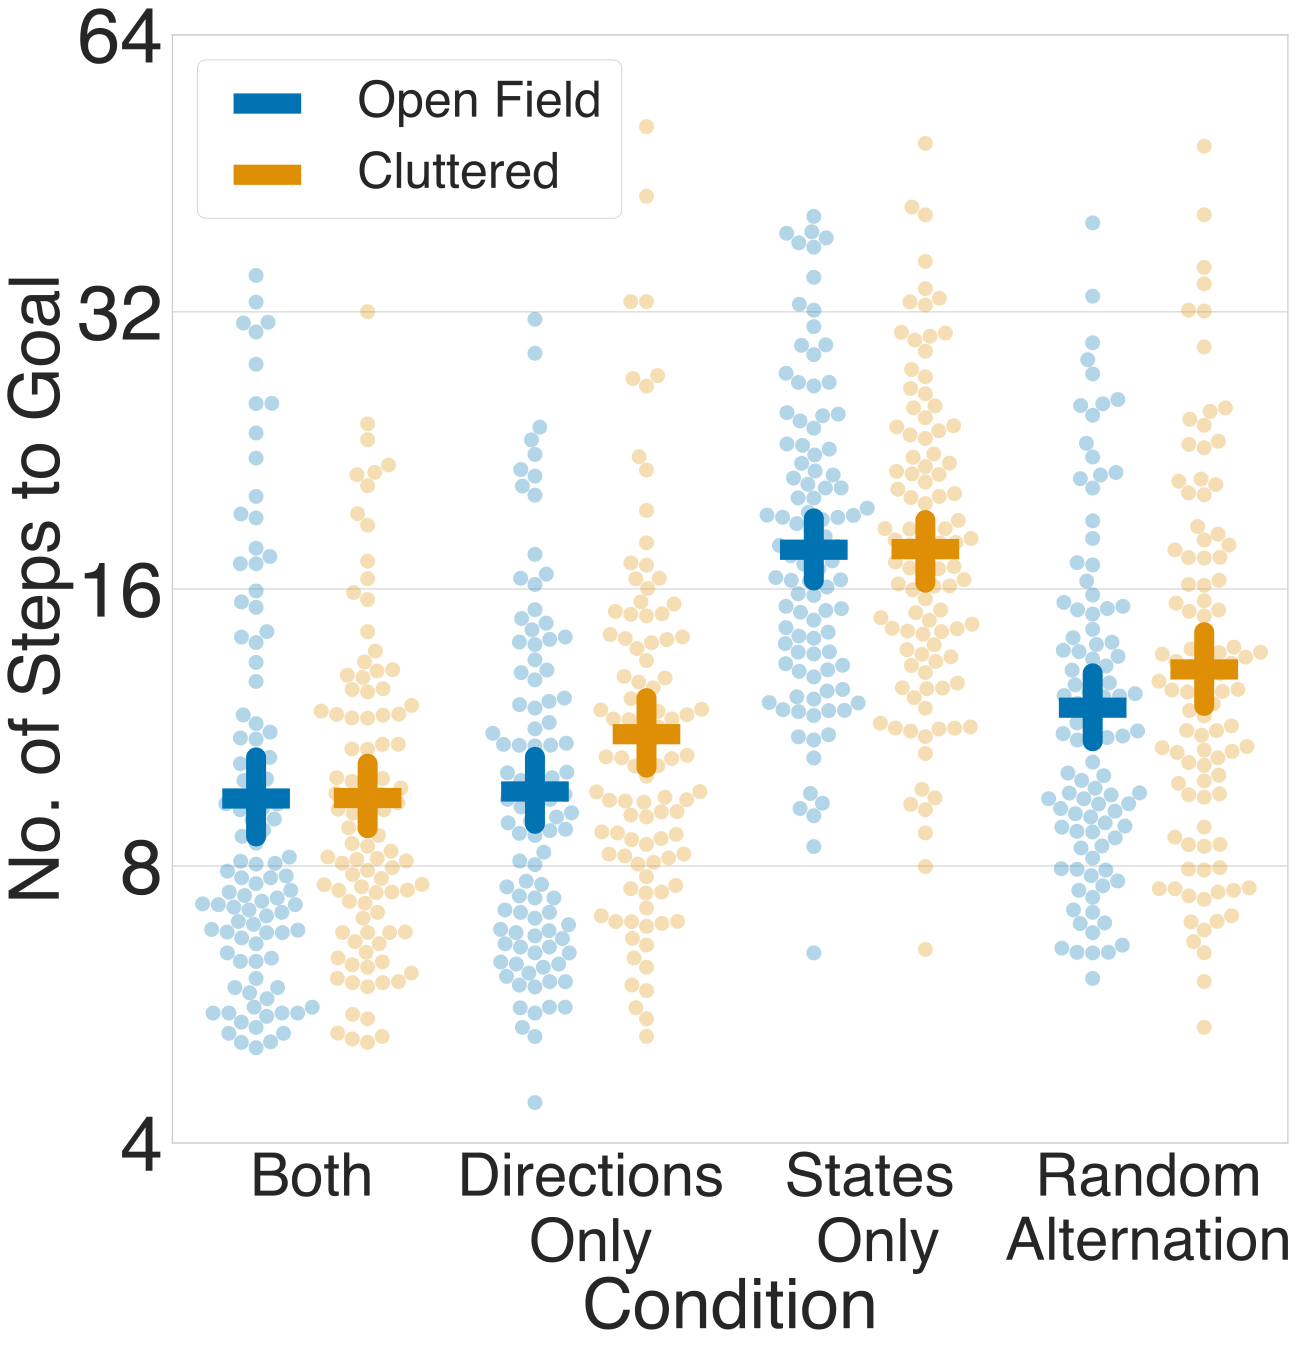

In [9]:
#Figure 2A
%matplotlib inline
#plot trials by actioncondition
temp = df.groupby(['partno', 'actioncondition', 'obstacles'])['resp_logsteps'].mean().reset_index()


sns.set(style="whitegrid", font_scale = 7)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams["font.stretch"] = 'expanded'
fig = plt.figure(figsize = (20,20))
order = ['both', 'vonly', 'tonly', 'random']
g = sns.pointplot(hue = 'obstacles', x = 'actioncondition', y = 'resp_logsteps', data = temp,  palette = 'colorblind', ci = 95, dodge = 0.4, linestyles = 'none', markers = '_', scale = 10, errwidth = 20, order = order)
g.set_ylabel('No. of Steps to Goal', fontsize = 70)
g.set_xlabel('Condition', fontsize = 70)
#get y tick values
g.set(ylim = (np.log(4), np.log(64)))
yticks = [np.log(4), np.log(8), np.log(16), np.log(32), np.log(64)]
g.set_yticks(yticks)
g.set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
g2 = sns.swarmplot( x = 'actioncondition', y = 'resp_logsteps', hue = 'obstacles', data = temp, alpha = .3,  size = 15, palette = 'colorblind', dodge = 0.9, order = order)
g2.set(xlabel = 'Condition', ylabel = 'No. of Steps to Goal')
g2.set_xticklabels(['Both', 'Directions\nOnly', 'States\n Only', 'Random\nAlternation'], fontsize = 60)
g2.legend(labels = ['_', '_', '_', '_', '_', 'Open Field', '_', '_', '_', '_', '_',  'Cluttered', '_'], fontsize = 50)

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/4104689513.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g[1].set_xticklabels([0, 25, 50, 75, 100])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/4104689513.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g[0].set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/4104689513.py:19: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x134112f10> starts with '_'. It is thus excluded from the legend.
  leg = ax.legend(loc = 'upper left', fontsize = 50, title_fontsize = 50, labels =  ['_', 'Open Field', '_', '_', 'Cluttered'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/4104689513.py:19: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x134168310> starts with '_'. It is thus exclu

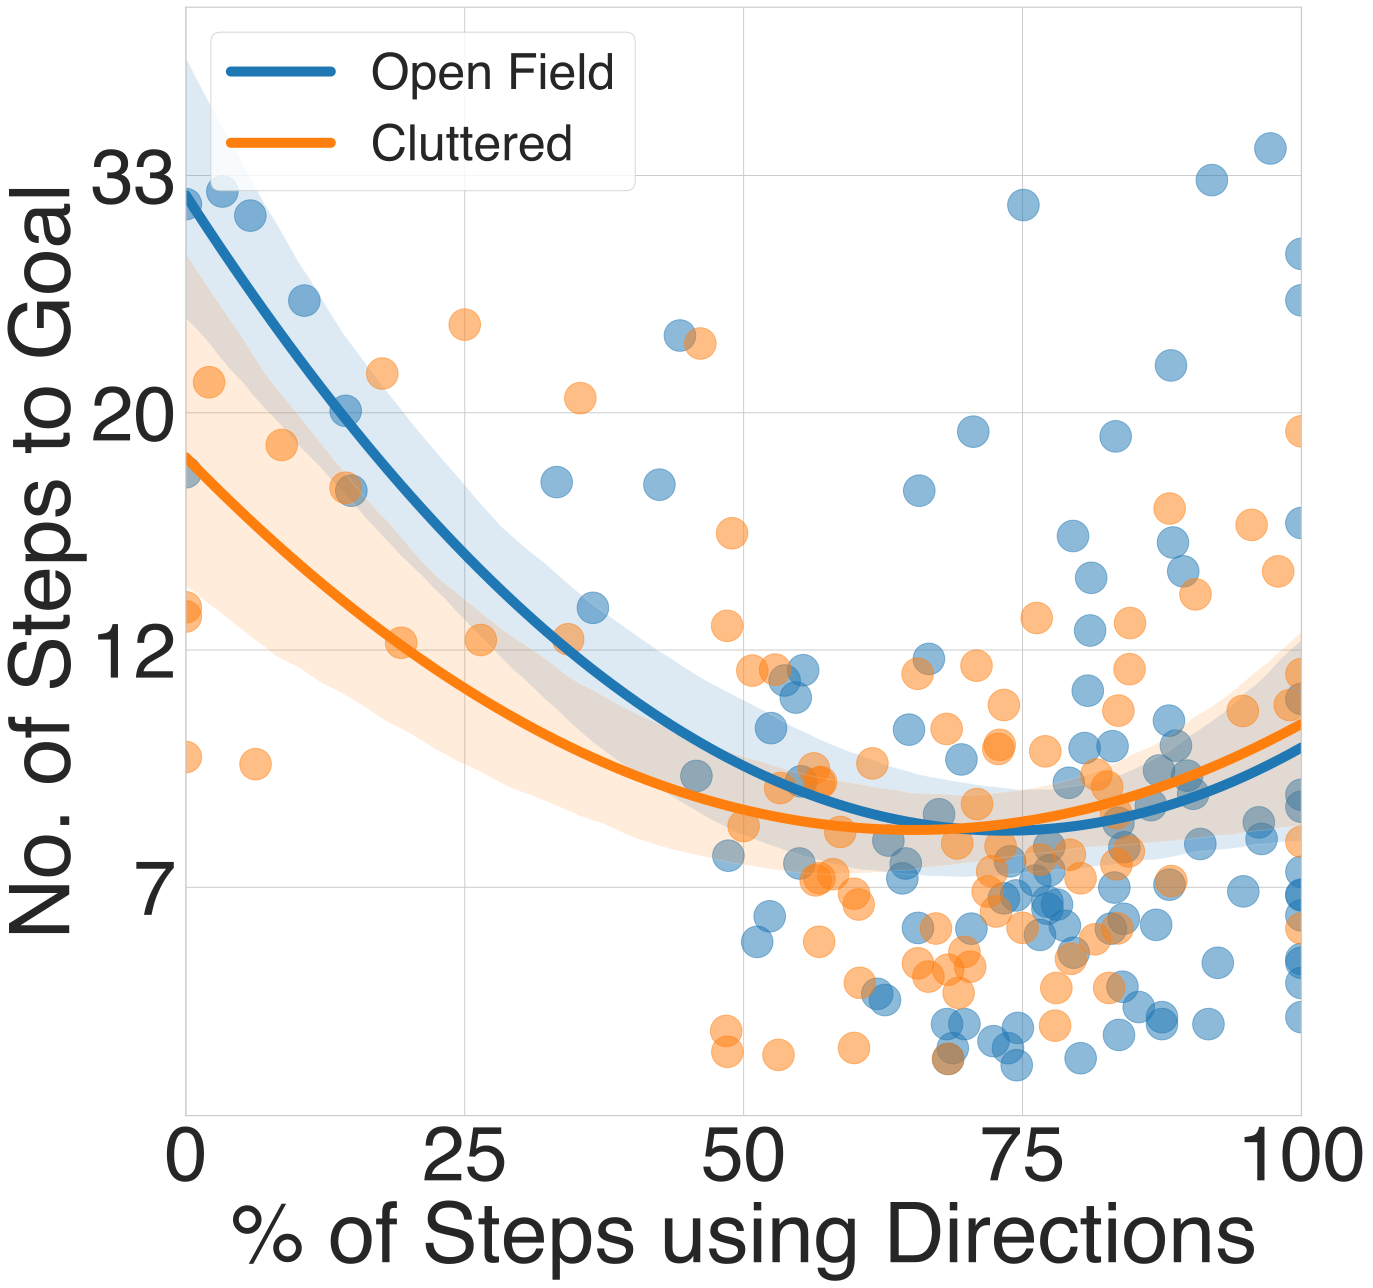

In [10]:
#Figure 2B
temp = df.groupby(['partno', 'actioncondition'])[['resp_logsteps', 'resp_steps','resp_directionperc']].mean().reset_index()
temp['obstacles'] = [df_part['obstacles'][df_part['partno'] == x].iloc[0] for x in temp['partno']]
fig, ax = plt.subplots(figsize = (20,20))
g = hue_regplot(data = temp[temp['actioncondition'] == 'both'], x = 'resp_directionperc', y = 'resp_logsteps', hue = 'obstacles', order = 2, line_kws = {'linewidth': 10}, scatter_kws = {'s': 1000, 'alpha': 0.5})
g[0].set(xlabel = 'Proportion of Steps using Vectors', ylabel = 'No. of Steps to Goal')
#xlabel font weight
g[0].set_xlabel('% of Steps using Directions', fontweight = 'bold')
#ylabel font weight
g[0].set_ylabel('No. of Steps to Goal', fontweight = 'bold')
#get x tick labels
xticks = g[1].get_xticks()
g[1].set_xticklabels([0, 25, 50, 75, 100])
# g[0].set_xticklabels([int(x*100) for x in xticks])
yticks = g[0].get_yticks()
g[0].set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
g[0].set(xlim = (0,1))
#legend
leg = ax.legend(loc = 'upper left', fontsize = 50, title_fontsize = 50, labels =  ['_', 'Open Field', '_', '_', 'Cluttered'])

#add markers at (0.81

In [11]:
#Figure 2B stats - median
temp2 = temp[temp['actioncondition'] == 'both']
#get median drectionperc
median = temp2['resp_directionperc'].median()
print(median)

0.737890625


In [12]:
#Figure 2B stats - linear regression model
#lin regress model from equation
import statsmodels.api as sm

df_part['resp_directionperc_dm'] = df_part['resp_directionperc'] - df_part['resp_directionperc'].mean()
df_part['resp_directionperc_dm2'] = df_part['resp_directionperc_dm']**2
df_part['resp_logsteps_dm'] = df_part['resp_logsteps'] - df_part['resp_logsteps'].mean()

reg_formula = 'resp_logsteps ~ resp_directionperc_dm*obstacles + resp_directionperc_dm2*obstacles'
reg_formula = 'resp_logsteps ~ resp_directionperc_dm + resp_directionperc_dm2'
reg_model = sm.OLS.from_formula(reg_formula, data = df_part[df_part['obstacles'] == False]).fit()
reg_model.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          resp_logsteps   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     12.15
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.81e-05
Time:                        16:13:30   Log-Likelihood:                -28.903
No. Observations:                 107   AIC:                             63.81
Df Residuals:                     104   BIC:                             71.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.4668      0.047     52.393      0.000       2.373       2.560
resp_directionperc_dm     -2.0721      0.499     -4.151      0.000      -3.062      -1.082
resp_directionperc_dm2    14.5007      5.458      2.657      0.009       3.676      25.325
==============================================================================
Omnibus:                        6.491   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.589
Skew:                           0.607   Prob(JB):                       0.0371
Kurtosis:                       2.919   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#Figure 2B descriptive stats
#mean direction perc
temp = df[df['actioncondition'] == 'both'].groupby(['prolificid', 'obstacles'])[['resp_directionperc']].mean().reset_index()
#mean in obstacles = false
print('mean direction perc in open field:', temp['resp_directionperc'][temp['obstacles'] == False].mean())
print('std direction perc in open field:', temp['resp_directionperc'][temp['obstacles'] == False].std())

#mean in obstacles = true
print('mean direction perc in cluttered:', temp['resp_directionperc'][temp['obstacles'] == True].mean())
print('std direction perc in cluttered:', temp['resp_directionperc'][temp['obstacles'] == True].std())

#independent samples t-test
t, p = stats.ttest_ind(temp['resp_directionperc'][temp['obstacles'] == False], temp['resp_directionperc'][temp['obstacles'] == True])
print('t:', t, 'p:', p, 'df', len(temp[temp['obstacles'] == False]) + len(temp[temp['obstacles'] == True]) - 2)


mean direction perc in open field: 0.7375742512202886
std direction perc in open field: 0.2310084566491169
mean direction perc in cluttered: 0.6362267835129959
std direction perc in cluttered: 0.2605801737260132
t: 2.8810761741226334 p: 0.004409262997849389 df 194


/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/3044879934.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, order = ['goal', 'landmark', 'none'])
/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/3044879934.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)
/Users/denislan/opt/anacon

[Text(0, 0.0, '0'),
 Text(0, 0.2, '20'),
 Text(0, 0.4, '40'),
 Text(0, 0.6, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100')]

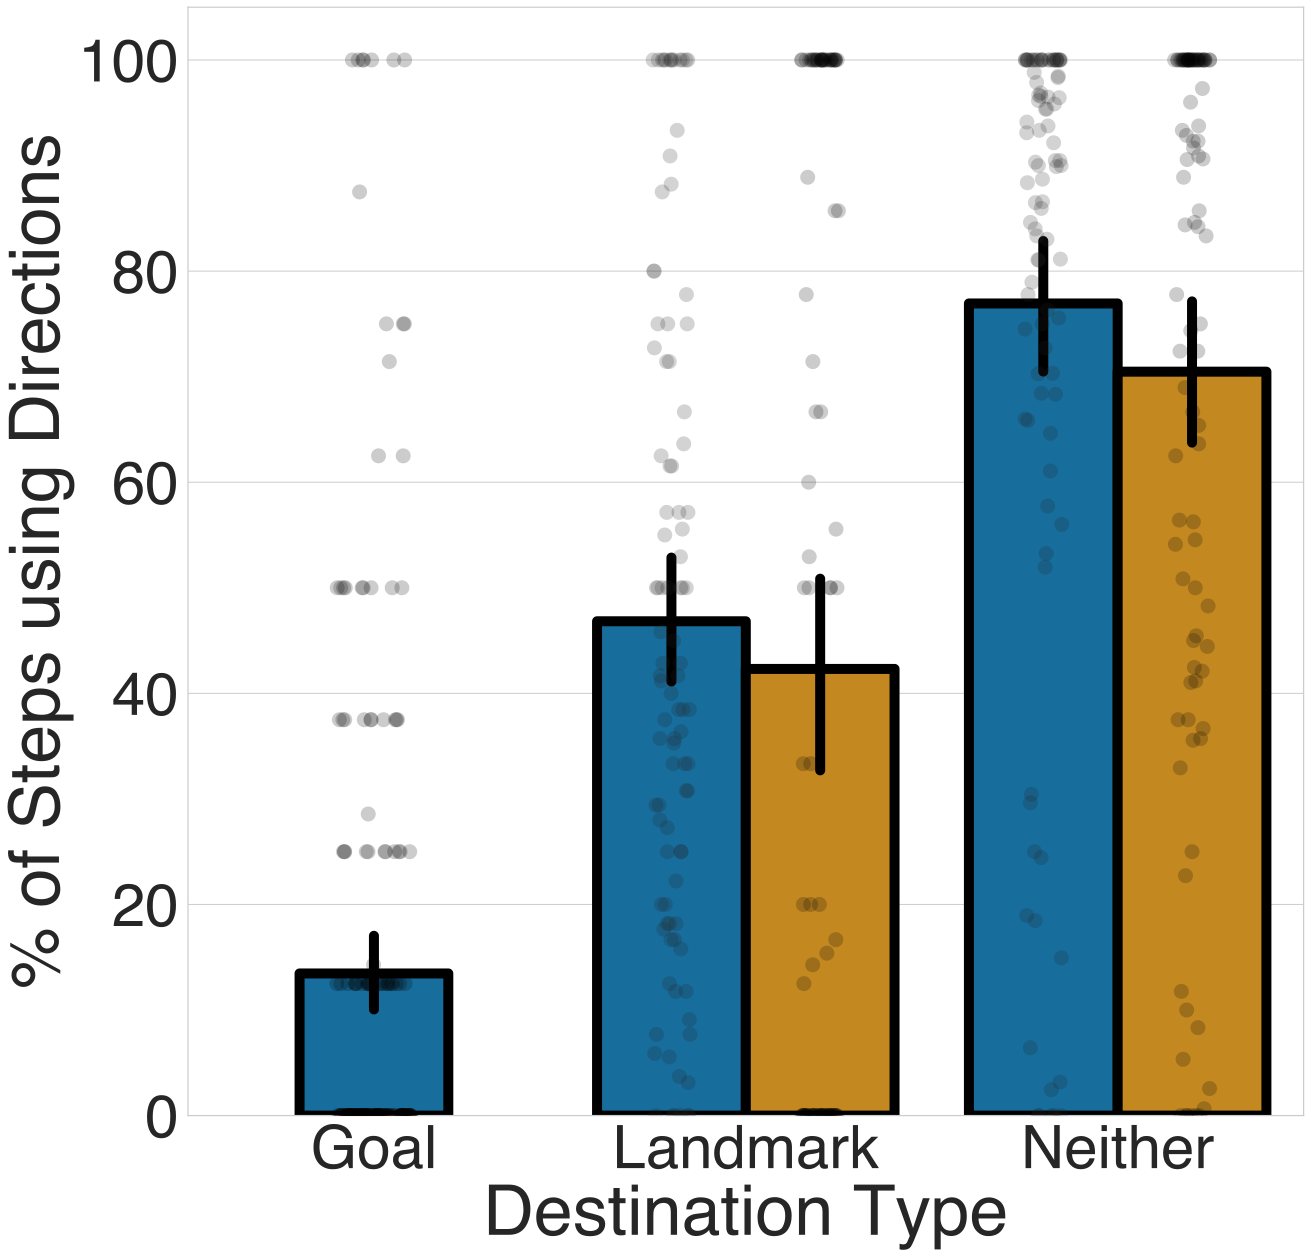

In [17]:
#Figure 2D
df_steps['resptype'] = df_steps['resptype'].astype('category')
df_steps['prevvisited'] = df_steps['prevvisited'].astype('str')
temp = df_steps[(df_steps['actioncondition'] == 'both') & (df_steps['obstacles'] == 1)].reset_index().groupby(['partno', 'newobjtype', 'prevvisited'], as_index = False)['resptype'].value_counts(normalize = True, dropna = True)
# temp = temp[temp['resptype'] == 'd'].reset_index().groupby(['model', 'desttype', 'landmarkencountered'], as_index = False)['proportion'].mean()
temp = temp[temp['resptype'] == 'd']
temp.reset_index(drop = True, inplace = True)
# temp = temp[~((temp['newobjtype'] == 'g') & (temp['prevvisited'] == 'True'))]

fig = plt.figure(figsize = (20,20))

g = sns.barplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', data = temp[temp['newobjtype'] != 'goal'], ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, order = ['goal', 'landmark', 'none'])
g = sns.barplot(x = 'newobjtype', y = 'proportion', data = temp[temp['newobjtype'] == 'goal'],   ci = 95, palette = 'colorblind', errwidth = 10, edgecolor = 'black', linewidth = 10, errcolor='black', hue_order = ['False', 'True'], alpha = 1, dodge = True, order = ['goal', 'landmark', 'none'], width = 0.4)

g2 = sns.stripplot(x = 'newobjtype', y = 'proportion', hue = 'prevvisited', dodge = 0.5, data = temp[temp['newobjtype'] != 'goal'], alpha = .2,  size = 15, color = 'black', hue_order = ['False', 'True'], order = ['goal', 'landmark', 'none'])
g2 = sns.stripplot(x = 'newobjtype', y = 'proportion',  data = temp[temp['newobjtype'] == 'goal'], alpha = .2,  size = 15, color = 'black',  order = ['goal', 'landmark', 'none'])
g.set_ylabel('% of Steps using Directions', fontsize = 70)
g.set_xlabel('Destination Type', fontsize = 70)
#font size

g.set_xticklabels(['Goal', 'Landmark', 'Neither'], fontsize = 60)
# no legend
g.get_legend().remove()
g.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
g.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize = 60)

In [21]:
df2 = pd.read_csv('data/df_exp2.csv', index_col = 0)
df2_part = pd.read_csv('data/df_exp2_part.csv', index_col = 0)
df2_steps = pd.read_csv('data/df_exp2_steps.csv', index_col = 0)

/var/folders/0y/gjx_6j1j6b74t37j8v49ws6m0000gs/T/ipykernel_33179/3936529712.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x = 'cond_numlandmarks', y = 'resp_logsteps', data = temp, ax = ax, ci = 95, dodge = 0.5, errwidth = 25, capsize = 0, join = True, markers = '_', scale = 8, color = 'black')
/Users/denislan/opt/anaconda3/envs/dl/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


[Text(0, 1.3862943611198906, '4'),
 Text(0, 2.0794415416798357, '8'),
 Text(0, 2.772588722239781, '16'),
 Text(0, 3.4657359027997265, '32'),
 Text(0, 4.1588830833596715, '64'),
 Text(0, 4.852030263919617, '128')]

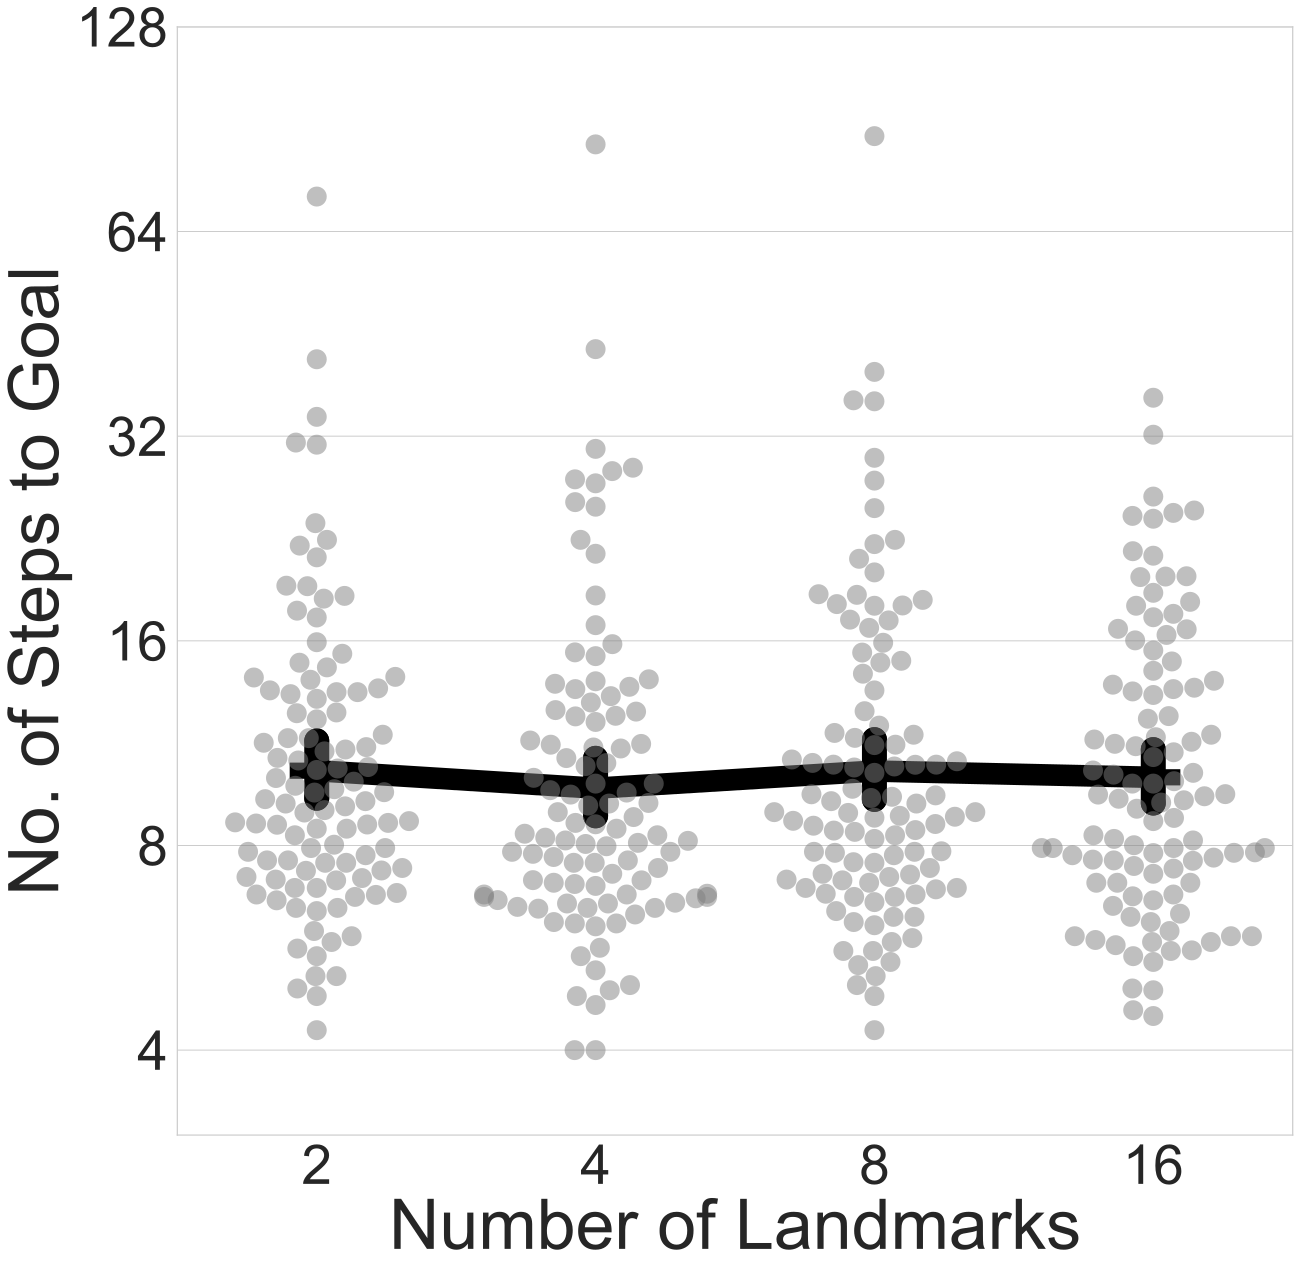

In [22]:
#Figure 2E
#log steps by num landmarks
sns.set(style="whitegrid", font_scale = 5)
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize = (20,20))
temp = df2.groupby(['partno', 'cond_numlandmarks'])['resp_logsteps'].mean().reset_index()
# temp = temp[temp['partno'] > 2]
# temp = temp[temp['partno'] > 40]
# temp = temp[temp['partno'].isin(partnos)]
sns.pointplot(x = 'cond_numlandmarks', y = 'resp_logsteps', data = temp, ax = ax, ci = 95, dodge = 0.5, errwidth = 25, capsize = 0, join = True, markers = '_', scale = 8, color = 'black')
sns.swarmplot(x = 'cond_numlandmarks', y = 'resp_logsteps', data = temp, ax = ax, alpha = 0.5, size = 20, color = 'grey')
# ax.set(xlabel = 'Number of Landmarks', ylabel = 'No. of Steps to Goal', fontsize = 70)
ax.set_xlabel('Number of Landmarks', fontsize = 70)
ax.set_ylabel('No. of Steps to Goal', fontsize = 70)
#set yticks to 4, 8, 16, 32, 64, 128
ax.set(ylim = (np.log(3), np.log(128)))
ax.set(yticks = [np.log(4), np.log(8), np.log(16), np.log(32), np.log(64), np.log(128)])
yticks = ax.get_yticks()
ax.set_yticklabels([np.round(np.exp(x)).astype(int) for x in yticks])
